In [7]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy


# load data
home = os.path.expanduser("~")
net = 'fb_linear_mV/wBA/10.0'

speed = 0.9

fp = f'../../output/{net}/smooth_{speed}'
with open(f'{fp}/out_smooth', 'rb') as handle:
    out = pickle.load(handle)    
            
with open(f'{fp}/params', 'rb') as handle:
    paramsi = pickle.load(handle)
            


dt = paramsi['dt']
delta = paramsi['spacing']
N = paramsi['nb_cells']
v = paramsi['speed'] #1.9
L =  N * delta #300 * 0.005

In [8]:

def compute_spatiotemporal_frequencies(signal, dt, delta):

    # Perform a 2D Fourier Transform on the signal
    ft_signal = np.fft.fft2(signal)

    # Shift the zero frequency component to the center
    ft_signal_shifted = np.fft.fftshift(ft_signal)

    # Compute the magnitude (for visualization)
    magnitude_spectrum = np.abs(ft_signal_shifted)
    
    # Get the frequency components along each dimension
    spatial_freqs = np.fft.fftfreq(signal.shape[0], d=dt)
    temporal_freqs = np.fft.fftfreq(signal.shape[1], d = delta)

    return spatial_freqs, temporal_freqs, magnitude_spectrum



def plot_spatiotemporal_frequencies(spatial_freqs, temporal_freqs, magnitude_spectrum):

    plt.figure(figsize=(8, 6))
    plt.imshow(magnitude_spectrum, extent=(temporal_freqs.min(), temporal_freqs.max(), spatial_freqs.min(), spatial_freqs.max()), aspect='auto')
    plt.plot()
    plt.colorbar(label='Magnitude')
    plt.xlabel('omega')
    plt.ylabel('k')
    plt.title('Spatiotemporal Frequency Spectrum')
    plt.show()


def ghat(omega,k, v, L, s2 = -1):
    return 1j * (np.exp((-1j * (omega-k*v*s2) * (L/v)) -1) /(omega-k*v*s2) )


# def extract_resonance_speed(magnitudes): 
#     N,tps = magnitudes.shape
#     max_idx = magnitudes.argmax()
#     spacemax = max_idx // tps
#     timemax = max_idx % tps
#     return (spacemax*0.005)/(timemax*0.001) #mm/s


In [23]:
out.keys()

dict_keys(['VB', 'OB', 'AB', 'NB', 'GB', 'RB', 'VA', 'OA', 'AA', 'NA', 'GA', 'RA', 'VG', 'AG', 'GG', 'NG', 'RG', 'inp', 'spat', 'F'])

In [26]:
signal = out['VB']
stim = out['VB']
signal = signal - signal.mean(axis = 0)
N, T = signal.shape

Text(0.0, 1.0, '$V_{B}$')

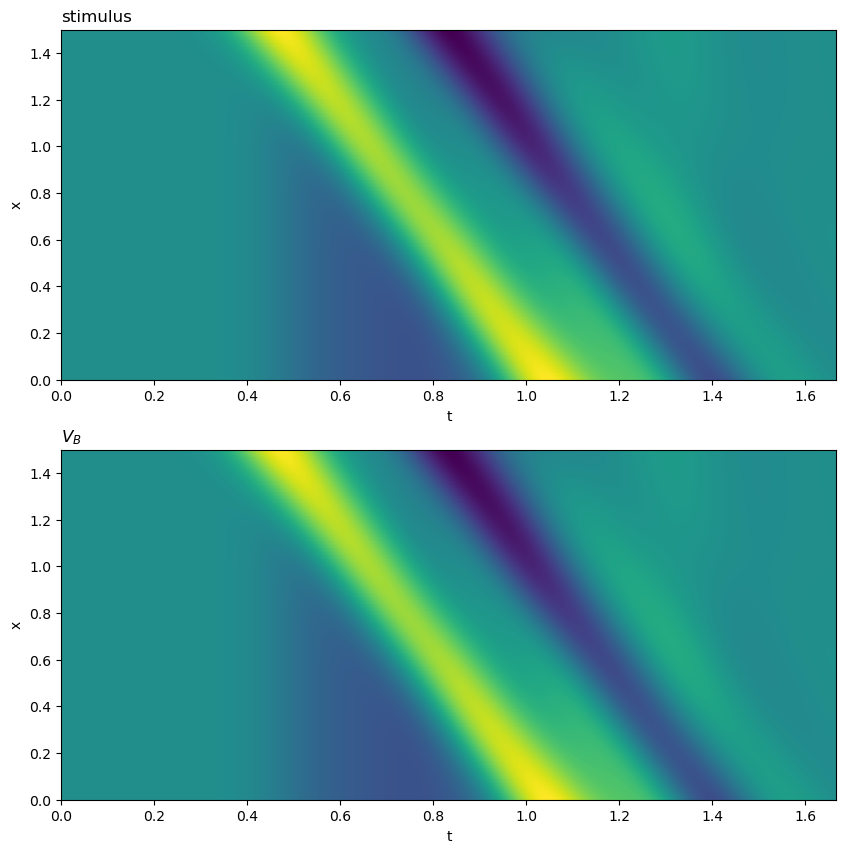

In [33]:
fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2,1)

ax = fig.add_subplot(gs[0,0])
ax.imshow(signal,extent=(0, T*dt, 0, L), aspect='auto')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('stimulus', loc = 'left')

ax = fig.add_subplot(gs[1,0])
ax.imshow(signal,extent=(0, T*dt, 0, L), aspect='auto')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title(r'$V_{B}$', loc = 'left')


In [34]:

spatial_freqs, temporal_freqs, magnitude_spectrum = compute_spatiotemporal_frequencies(signal, dt = paramsi['dt'], delta = paramsi['spacing'])

omega_range = np.linspace(temporal_freqs.max(), temporal_freqs.min(), len(spatial_freqs))
krange_range = np.linspace(spatial_freqs.max(), spatial_freqs.min(), len(temporal_freqs))


omega_mat = np.zeros((len(spatial_freqs),len(temporal_freqs)))
k_mat = np.zeros((len(spatial_freqs),len(temporal_freqs)))

for row in range(len(krange_range)):
    omega_mat[:,row] = omega_range

for col in range(len(omega_range)):
    k_mat[col,:] = krange_range


ghat_mat  =ghat(omega_mat,k_mat,v,L)


Text(0.5, 1.0, 'spectrum- g_hat')

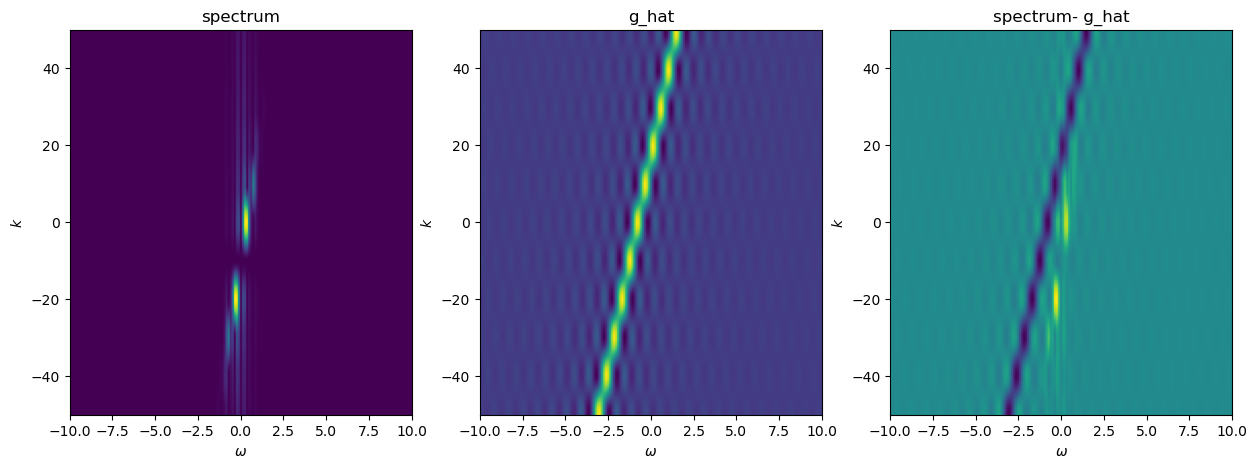

In [37]:
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(1,3)



ax = fig.add_subplot(gs[0,0])
ax.imshow(magnitude_spectrum,extent=(temporal_freqs.min(), temporal_freqs.max(), spatial_freqs.min(), spatial_freqs.max()), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-50,50)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('spectrum')

ax = fig.add_subplot(gs[0,1])
ax.imshow(ghat_mat.real,extent=(temporal_freqs.min(), temporal_freqs.max(), spatial_freqs.min(), spatial_freqs.max()), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-50,50)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('g_hat')


ax = fig.add_subplot(gs[0,2])
ax.imshow(magnitude_spectrum/magnitude_spectrum.max()-ghat_mat.real/ghat_mat.real.max(),extent=(temporal_freqs.min(), temporal_freqs.max(), spatial_freqs.min(), spatial_freqs.max()), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-50,50)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('spectrum- g_hat')


In [38]:
# match amplitudes
# transform into right frequencies
